# Load Data

In [ ]:
pip install formulas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 3.3 MB/s 
     |████████████████████████████████| 955 kB 10.3 MB/s 


In [ ]:
from formulas import *
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
keras = tf.keras

## Data Extraction

In [ ]:
X = input()

1


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 808 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Ntfx = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab/Netflix.csv')
Ntfx['Date'] = pd.to_datetime(Ntfx['Date'])

In [ ]:
Ntfx.tail(100)

,Date,Open,High,Low,Close,Adj Close,Volume
4481,2020-03-12,326.500000,335.720001,307.320007,315.250000,315.250000,12071600
4482,2020-03-13,330.510010,336.420013,307.390015,336.299988,336.299988,9458200
4483,2020-03-16,306.630005,334.350006,294.750000,298.839996,298.839996,10559900
4484,2020-03-17,306.190002,322.899994,290.250000,319.750000,319.750000,10013900
4485,2020-03-18,302.399994,331.579987,300.000000,315.470001,315.470001,12593600
...,...,...,...,...,...,...,...
4576,2020-07-28,496.019989,497.790009,487.760010,488.510010,488.510010,5986700
4577,2020-07-29,492.250000,494.920013,484.130005,484.480011,484.480011,6611800
4578,2020-07-30,480.709991,488.350006,477.510010,485.799988,485.799988,6608600
4579,2020-07-31,488.290009,494.799988,484.500000,488.880005,488.880005,5924300


In [ ]:
Ntfx.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
Ntfx.dropna(inplace=True)
print(Ntfx)

           Date        Open        High         Low       Close   Adj Close  \
0    2002-05-23    1.156429    1.242857    1.145714    1.196429    1.196429   
1    2002-05-24    1.214286    1.225000    1.197143    1.210000    1.210000   
2    2002-05-28    1.213571    1.232143    1.157143    1.157143    1.157143   
3    2002-05-29    1.164286    1.164286    1.085714    1.103571    1.103571   
4    2002-05-30    1.107857    1.107857    1.071429    1.071429    1.071429   
...         ...         ...         ...         ...         ...         ...   
4576 2020-07-28  496.019989  497.790009  487.760010  488.510010  488.510010   
4577 2020-07-29  492.250000  494.920013  484.130005  484.480011  484.480011   
4578 2020-07-30  480.709991  488.350006  477.510010  485.799988  485.799988   
4579 2020-07-31  488.290009  494.799988  484.500000  488.880005  488.880005   
4580 2020-08-03  490.859985  503.089996  490.230011  498.619995  498.619995   

         Volume  
0     104790000  
1      11104800

### TSLA Train Test Split

In [ ]:
series = Ntfx['Close'] 

# Create train data set
train_split_date = '2015-12-31'
train_split_index = np.where(Ntfx.Date == train_split_date)[0][0]
x_train = Ntfx.loc[Ntfx['Date'] <= train_split_date]['Close']
# Create test data set
test_split_date = '2018-01-02'
test_split_index = np.where(Ntfx.Date == test_split_date)[0][0]
x_test = Ntfx.loc[Ntfx['Date'] >= test_split_date]['Close']

# Create valid data set
valid_split_index = (train_split_index.max(),test_split_index.min())
x_valid = Ntfx.loc[(Ntfx['Date'] < test_split_date) & (Ntfx['Date'] > train_split_date)]['Close']

In [ ]:
train_split_date = '2015-12-31'
train_split_index = np.where(Ntfx.Date == train_split_date)
x_train = Ntfx.loc[Ntfx['Date'] <= train_split_date]['Close']
x_test

3930    201.070007
3931    205.050003
3932    205.630005
3933    209.990005
3934    212.050003
           ...    
4576    488.510010
4577    484.480011
4578    485.799988
4579    488.880005
4580    498.619995
Name: Close, Length: 651, dtype: float64

3426 3427 3929 3930 4580


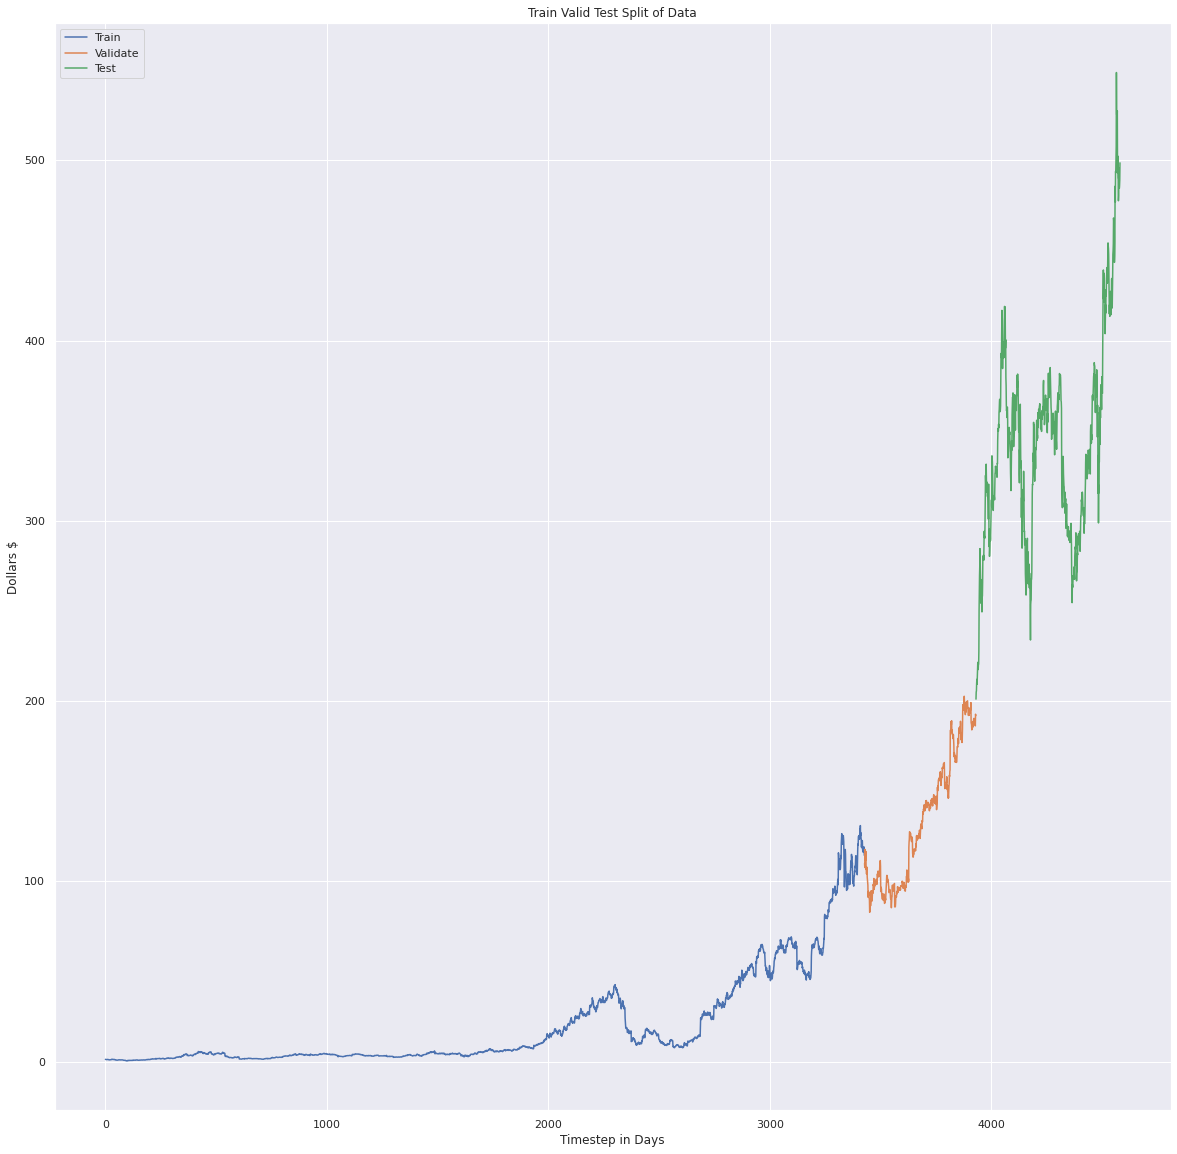

In [ ]:
# set style of charts
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = [20, 20]

# Create a plot showing the split of the train, valid, and test data
plt.plot(x_train, label = 'Train')
plt.plot(x_valid, label = 'Validate')
plt.plot(x_test, label = 'Test')
plt.title('Train Valid Test Split of Data')
plt.ylabel('Dollars $')
plt.xlabel('Timestep in Days')
plt.legend()
print(x_train.index.max(),x_valid.index.min(),x_valid.index.max(),x_test.index.min(),x_test.index.max())

In [ ]:
# Lets create a dictionary to store all of our model training scores to view later
model_mae_scores = {}

### Base Model-Naive Forecasting

Text(0.5, 1.0, 'Price History of Ntfx Jan-1993 to Dec-2020')

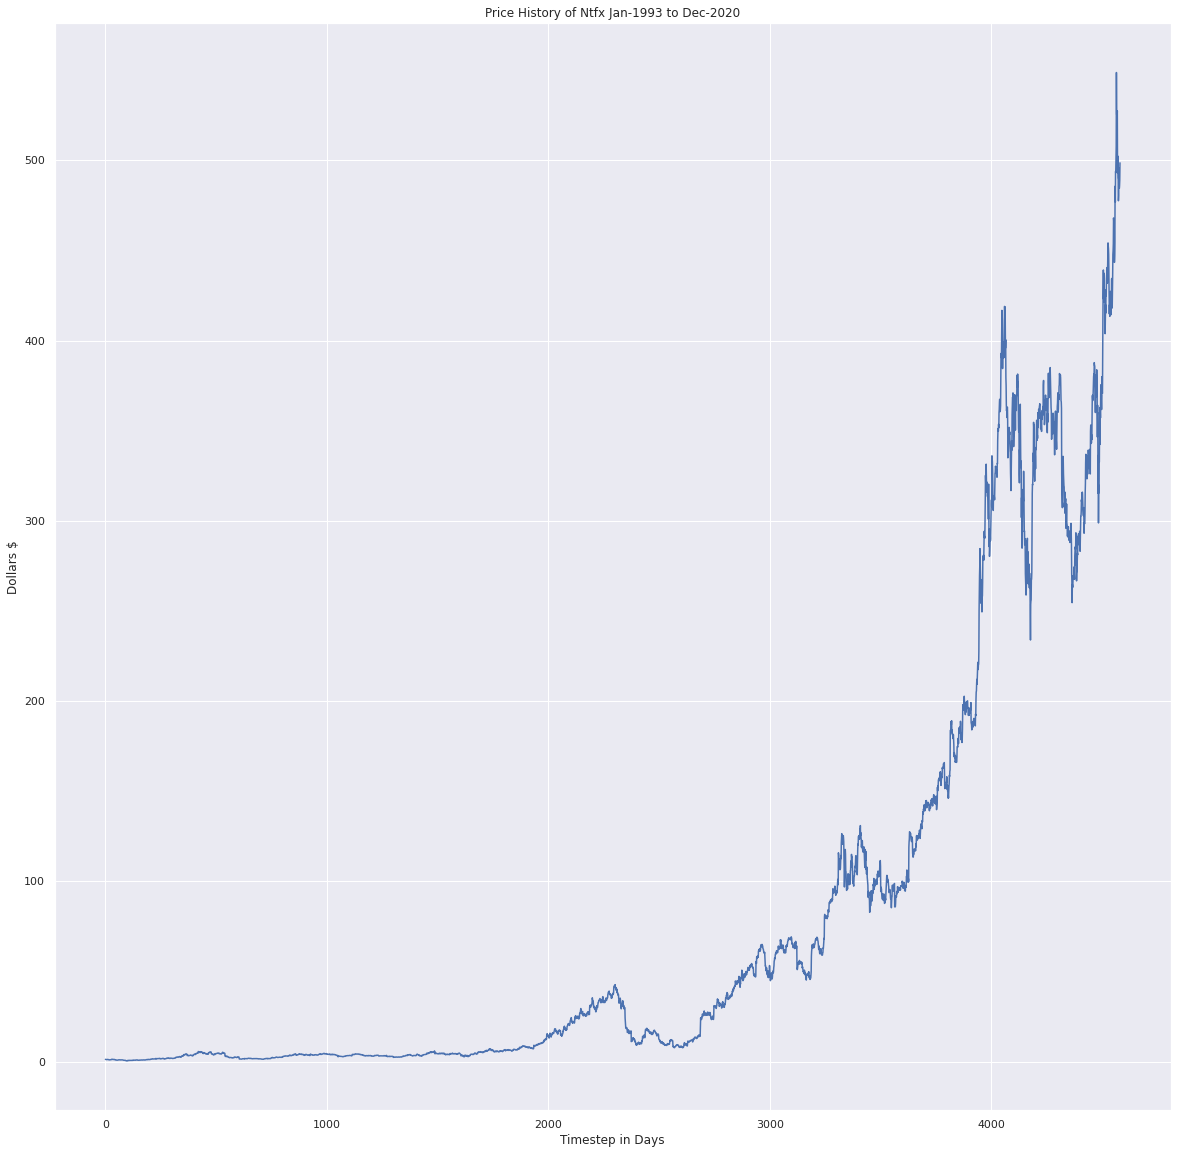

In [ ]:
# Plot chart with all details untouched
plt.plot(Ntfx.index, Ntfx['Close'], label = 'TSLA Close price')
plt.ylabel('Dollars $')
plt.xlabel('Timestep in Days')
plt.title('Price History of Ntfx Jan-1993 to Dec-2020')

In [ ]:
naive_forecast = series[test_split_index-1 :-1]
naive_forecast

3929    191.960007
3930    201.070007
3931    205.050003
3932    205.630005
3933    209.990005
           ...    
4575    495.649994
4576    488.510010
4577    484.480011
4578    485.799988
4579    488.880005
Name: Close, Length: 651, dtype: float64

Text(0.5, 1.0, 'Naive Forecast vs Actual')

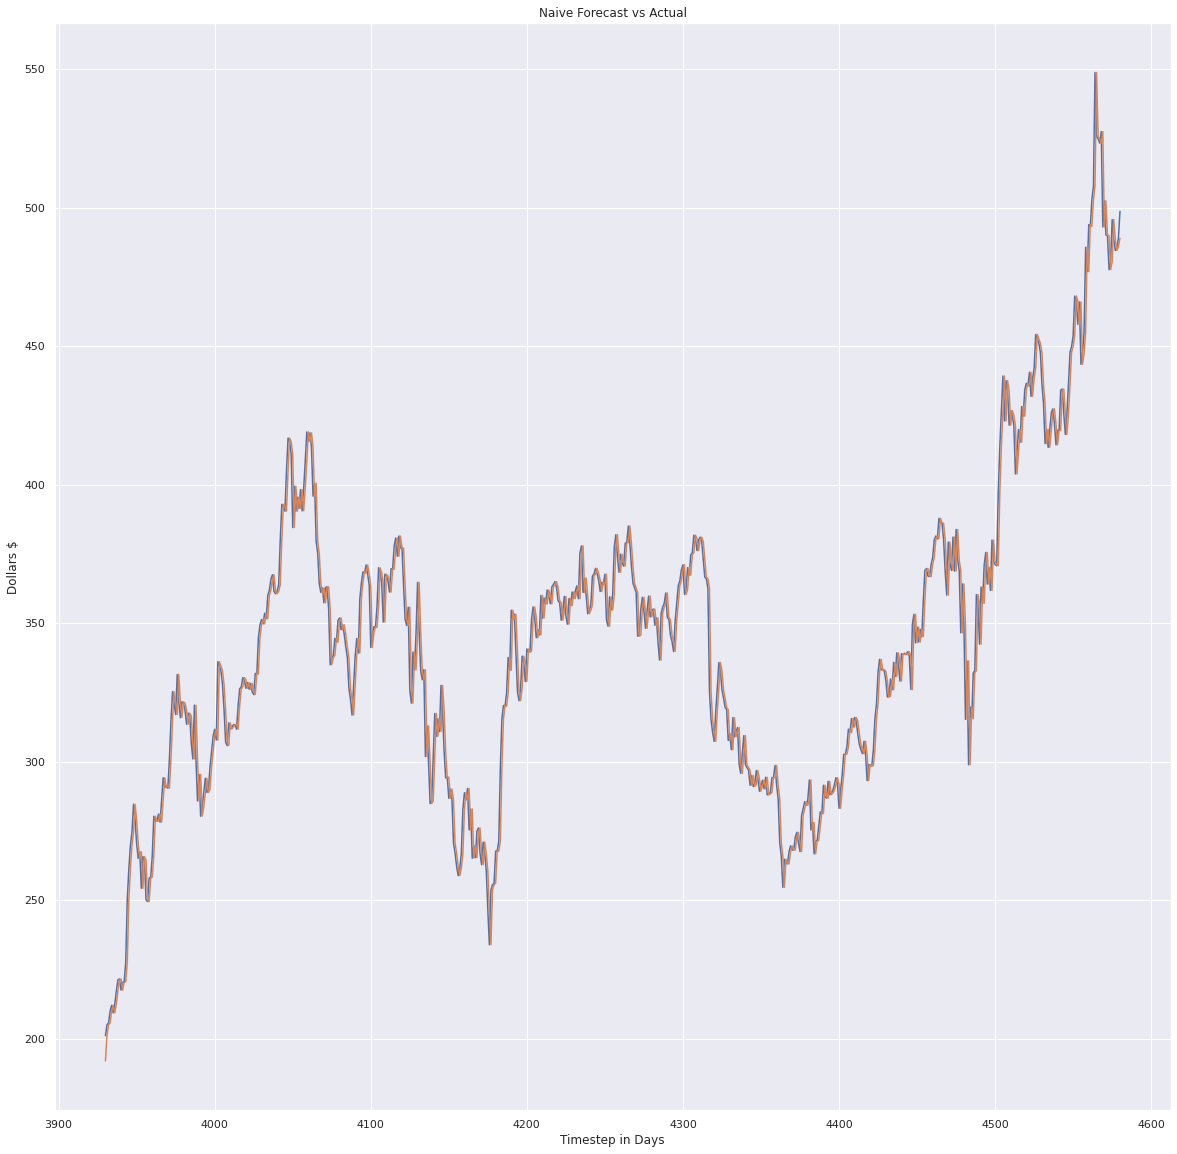

In [ ]:
plt.figure(figsize=(20, 20))
plt.plot(x_test.index, x_test, label="Actual")
plt.plot(x_test.index, naive_forecast, label="Forecast")
plt.ylabel('Dollars $')
plt.xlabel('Timestep in Days')
plt.title('Naive Forecast vs Actual')

### Calculate Error in Naive Model

In [ ]:
# Alternative way to show MAE to stay consistent with what we will be doing later
naive_forecast_mae = keras.metrics.mean_absolute_error(x_test, naive_forecast).numpy()
model_mae_scores['naive'] = naive_forecast_mae

# view the dictionary of mae scores
model_mae_scores

NameError: ignored

In [ ]:
# Show first 3 values of our forecast
print(naive_forecast.values[:3])

# Show first 3 values of validation data
print(x_test.values[:3])

# Calculate and show first 3 values of the calculated error (MAE)
print('*'*100)
print(np.abs(naive_forecast[:3].values - x_test[:3].values))

# ARIMA

### Step1-Stationarity Check

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(Ntfx['Close'])
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(Ntfx['Close'])

ADF Test Statistic : 2.1544060270384473
p-value : 0.9988428453111282
#Lags Used : 32
Number of Observations Used : 4548
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Step 2 Differencing


In [ ]:
Ntfx['Close First Difference'] = Ntfx['Close'] - Ntfx['Close'].shift(1)
Ntfx['Close'].shift(1)
adfuller_test(Ntfx['Close First Difference'].dropna())

ADF Test Statistic : -11.647849940656945
p-value : 2.0713897518303975e-21
#Lags Used : 31
Number of Observations Used : 4548
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


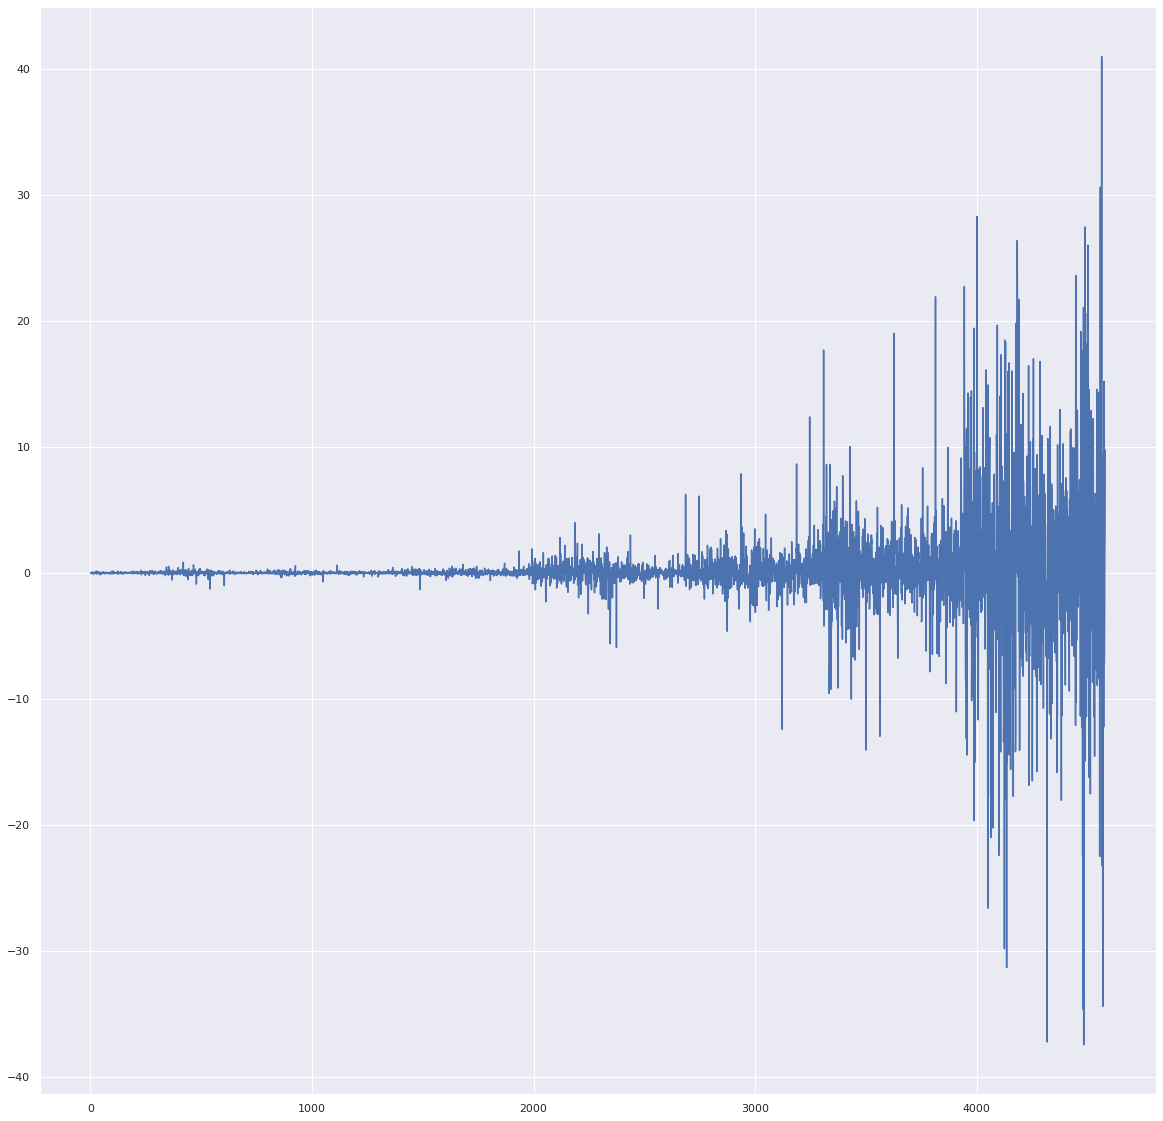

In [ ]:
Ntfx['Close First Difference'].plot()

### Step 3: Autocorrelation and Partial autocorrelation

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

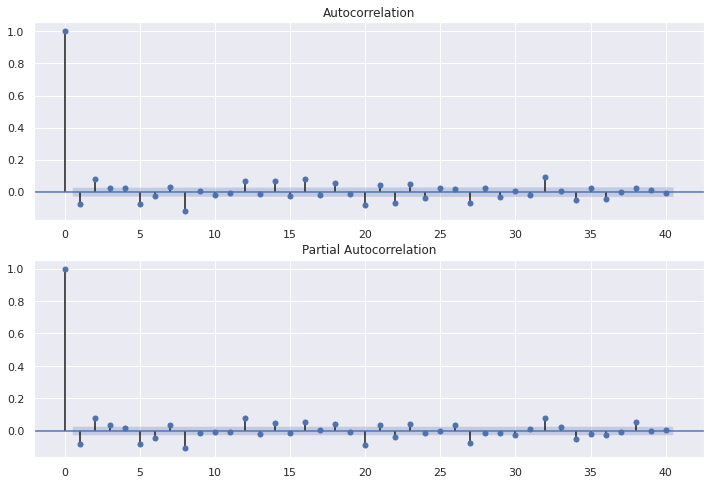

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# plot_acf(tsla['Close First Difference'])
# plt.xlabel('Lags (Days)')
# plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Ntfx['Close First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Ntfx['Close First Difference'].iloc[13:],lags=40,ax=ax2)

### Testing different arima models

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Taking P = 2, D = 1, Q = 0 as the parmeters
# fit model
Ntfx_arima = ARIMA(x_train, order=(2,1,0))
Ntfx_arima_fit = tsla_arima.fit(disp=0)
print(tsla_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3426
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -4891.173
Method:                       css-mle   S.D. of innovations              1.009
Date:                Sun, 28 Aug 2022   AIC                           9790.347
Time:                        13:29:05   BIC                           9814.904
Sample:                             1   HQIC                          9799.120
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0330      0.019      1.763      0.078      -0.004       0.070
ar.L1.D.Close     0.0889      0.017      5.204      0.000       0.055       0.122
ar.L2.D.Close    -0.0102      0.017     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


### Step 4: Building the Arima Model and Forecasting 

In [ ]:
# Create list of x train valuess
history = [x for x in x_train]

# establish list for predictions
model_predictions = []

# Count number of test data points
N_test_observations = len(x_test)

# loop through every data point
for time_point in list(x_test.index[-60:]):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = x_test[time_point]
    history.append(true_test_value)
        
MAE_error = keras.metrics.mean_absolute_error(x_test, model_predictions).numpy()
print('Testing Mean Squared Error is {}'.format(MAE_error))

%store model_predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error is [228.70767087  71.02218591  49.74152724  94.71302567 100.79090591
 103.55682094 114.70198307 112.84791423 111.87508605 108.82204182
  98.70647207  93.07611845  81.14011883  85.50963828  79.92654925
  85.17512446  89.87505852  90.98778712  86.67580646  80.83411106
  85.09849509  84.63973616  96.96364496  96.80897021  89.5870898
  83.81298832  89.90303007  98.50581891 108.7225571  110.46980788
 114.25492905 127.51767686 125.35277196 117.99917264 125.82645261
 104.55119038 109.0778643  115.43962003 144.02707908 134.68200421
 152.06373    150.61711549 160.52087907 165.11750627 206.29519062
 181.81856907 182.700044   180.58874022 184.71940722 150.77382456
 160.76209938 147.9956736  148.05540534 136.35177149 139.17717091
 153.3820423  146.36860952 142.92186544 144.09630558 146.9191967 ]
Stored 'model_predictions' (list)


In [ ]:
output

(array([488.9880626]),
 array([5.73635736]),
 array([[477.74500877, 500.23111644]]))

In [ ]:
# %store model_predictions
%store -r model_predictions

# Check to see if it reloaded
model_predictions[:5]

[array([114.22767454]),
 array([401.28979602]),
 array([368.8537192]),
 array([431.6887968]),
 array([438.75861545])]

In [ ]:
model_predictions
print(len(model_predictions))
print(len(x_test))

60
651


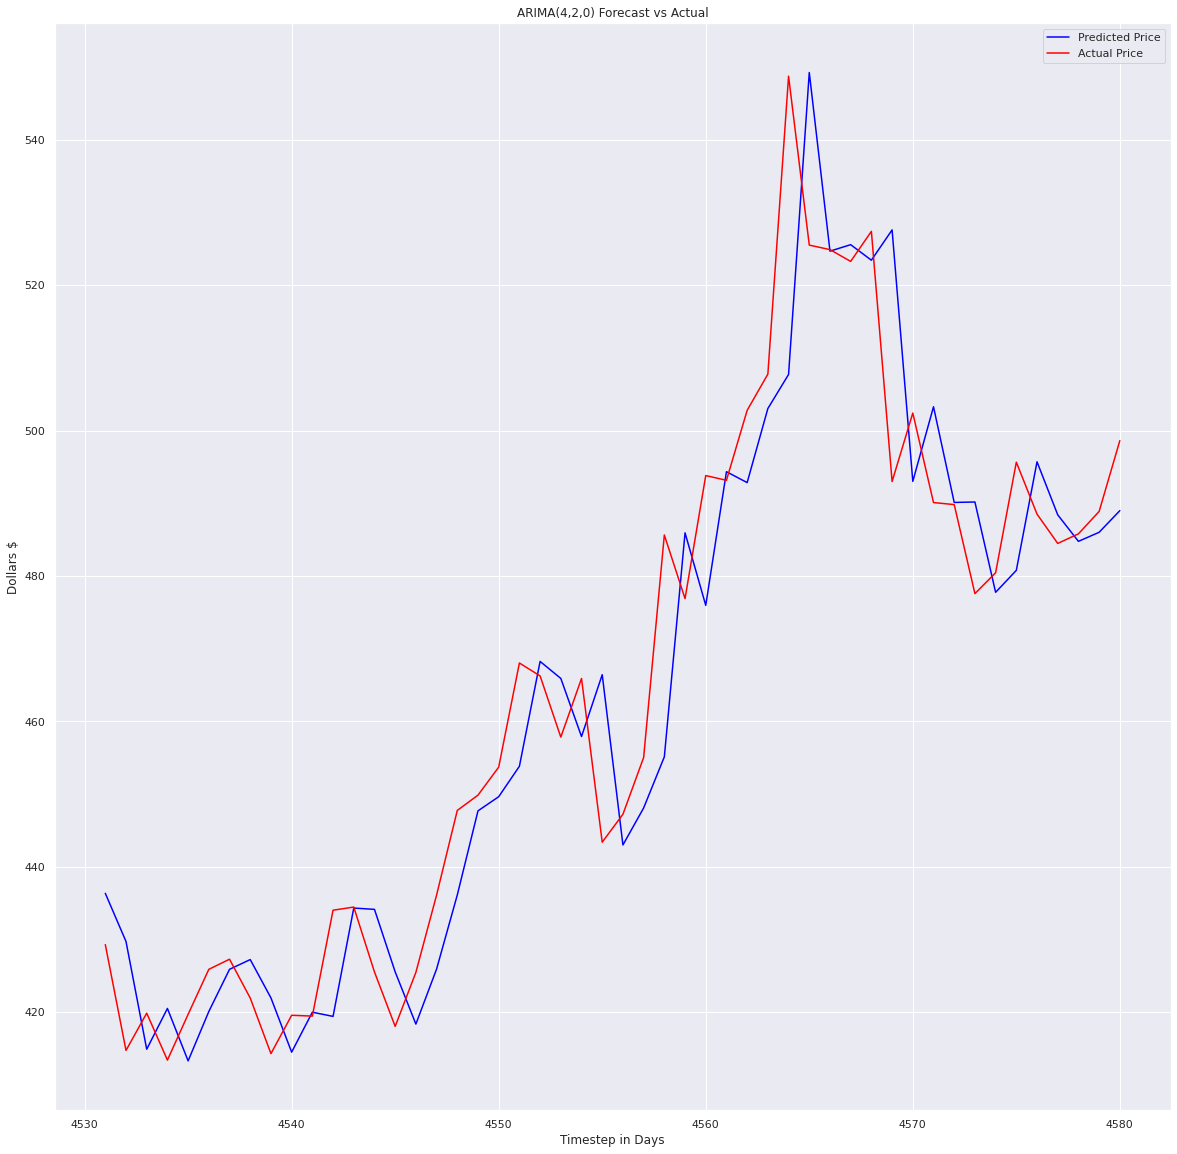

<Figure size 720x432 with 0 Axes>

In [ ]:
# Plot our predictions against the actual values for a visual comparison.
plt.plot(x_test.index[-50:], model_predictions[-50:], color='blue',label='Predicted Price')
plt.plot(x_test.index[-50:], x_test[-50:], color='red', label='Actual Price')
plt.ylabel('Dollars $')
plt.xlabel('Timestep in Days')
plt.title('ARIMA(4,2,0) Forecast vs Actual')
plt.legend()
plt.figure(figsize=(10,6))
plt.show()

#### Show Error in model vs actual

In [ ]:
# Find the Error in the ARIMA Model
arima_error = model_predictions - x_test[0:30].values
arima_error

array([[ -86.84233246,  -90.82232846,  -91.40233046, ..., -135.24232646,
        -143.72233746, -144.04231446],
       [ 200.21978902,  196.23979302,  195.65979102, ...,  151.81979502,
         143.33978402,  143.01980702],
       [ 167.7837122 ,  163.8037162 ,  163.2237142 , ...,  119.3837182 ,
         110.9037072 ,  110.5837302 ],
       ...,
       [ 283.69616624,  279.71617024,  279.13616824, ...,  235.29617224,
         226.81616124,  226.49618424],
       [ 284.94150796,  280.96151196,  280.38150996, ...,  236.54151396,
         228.06150296,  227.74152596],
       [ 287.9180556 ,  283.9380596 ,  283.3580576 , ...,  239.5180616 ,
         231.0380506 ,  230.7180736 ]])

# Summary of Both Model Results

In [ ]:
Arima_forecast_mae = keras.metrics.mean_absolute_error(x_test, model_predictions).numpy()
model_mae_scores['ARIMA'] = Arima_forecast_mae

# view the dictionary of mae scores
model_mae_scores

{'naive': 6.730476178187406,
 'ARIMA': array([228.70767087,  71.02218591,  49.74152724,  94.71302567,
        100.79090591, 103.55682094, 114.70198307, 112.84791423,
        111.87508605, 108.82204182,  98.70647207,  93.07611845,
         81.14011883,  85.50963828,  79.92654925,  85.17512446,
         89.87505852,  90.98778712,  86.67580646,  80.83411106,
         85.09849509,  84.63973616,  96.96364496,  96.80897021,
         89.5870898 ,  83.81298832,  89.90303007,  98.50581891,
        108.7225571 , 110.46980788, 114.25492905, 127.51767686,
        125.35277196, 117.99917264, 125.82645261, 104.55119038,
        109.0778643 , 115.43962003, 144.02707908, 134.68200421,
        152.06373   , 150.61711549, 160.52087907, 165.11750627,
        206.29519062, 181.81856907, 182.700044  , 180.58874022,
        184.71940722, 150.77382456, 160.76209938, 147.9956736 ,
        148.05540534, 136.35177149, 139.17717091, 153.3820423 ,
        146.36860952, 142.92186544, 144.09630558, 146.9191967 ])}

In [ ]:
# Model Evaluation for ARIMA
from sklearn.metrics import mean_squared_error


In [ ]:
error_ARIMA=np.sqrt(mean_squared_error(x_test[0:60],model_predictions))
error_ARIMA

186.27182147357786

In [ ]:
#Model Evaluation for Naive
error_naive=np.sqrt(mean_squared_error(x_test, naive_forecast))
error_naive

9.164823380652464